In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

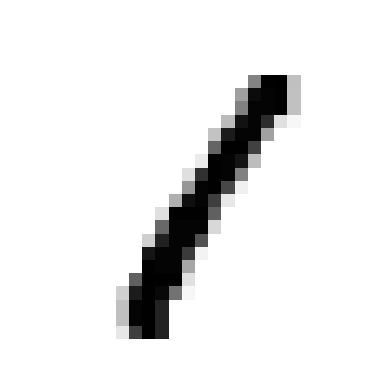

In [2]:
X, Y = mnist["data"], mnist["target"].astype(np.uint8)
some_digit = X[3]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()


In [3]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [5]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:1000], Y_train[:1000]) # y_train, not y_train_5


SVC()

In [10]:
svm_clf.predict([X[1015]])

array([0], dtype=uint8)

In [11]:
Y[1015]

0